**This Notebook is for BCG Virtual Internship only.**

**This Notebook was prepaired by Rushabh Panbude.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import pickle


In [ ]:
# Show plots in jupyter notebook
%matplotlib inline

In [ ]:
# Set plot style
sns.set(color_codes=True)

In [ ]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

# **Loading data**

Explicitly show how paths are indicated

In [ ]:
TRAINING_DATA = "/content/ml_case_training_data.csv"
HISTORY_DATA = "/content/ml_case_training_hist_data.csv"
CHURN_DATA = "/content/ml_case_training_output.csv"

In [ ]:
train_data = pd.read_csv(TRAINING_DATA)
churn_data = pd.read_csv(CHURN_DATA)
history_data = pd.read_csv(HISTORY_DATA)

We will also print the first 3 rows to the screen. Just to see what the first dataset looks like

In [ ]:
train_data.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800


From above we can already see that there are a lot of NaN values. We will replace or remove those values later.

The first 3 rows of the dataframe also show us that there is numeric data and categorical data, which we will need to transform to the right form


In [ ]:
churn_data.head(3)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


It seems the churn data is in the correct format as it shows 0 for not churned and 1 for churned


In [ ]:
history_data.head(3)


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


**Combining two dataframes**

We loaded data in two different pandas dataframes. Nonetheless, we might be interested in putting the data into a single dataframe to access it more
easily. We can merge the two dataframes on a common column ( id ) using the function pd.merge() from pandas.

In [ ]:
train = pd.merge(train_data, churn_data, on="id")

In [ ]:
# Let's take a look at the new train dataframe, this time at the last 5 rows.
train.tail(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


# **General statistics of a dataframe**

**Data types**
Often, it is useful to understand what data we are dealing with, as the data types might end up causing errors into our analysis at a later stage.

Below, we can quickly see the dates in our dataset are not datetime types yet, which means we might need to convert them. In addition, we can
see that the churn is full of integers so we can keep it in that form.

Note: We've transformed the output to a dataframe to facilitate visualization


In [ ]:
pd.DataFrame({"Data type":train.dtypes})

,Data type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [ ]:
pd.DataFrame({"Data type":history_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


**Dataframe statistics**

Let's also look at the basic statistics of the data.


In [ ]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


From above we can obtain a lot of information about the dataset we are dealing with. Some key facts include:

In [ ]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


For this dataset, it looks overall good.

We might be a bit concerned about the negative values in the fix price column. One more time, this might be corruped data and we will change
them to positive when cleaning the data.

**Missing data**
We are also concerned we have a lot of missing data so we can check how much of our data is missing.

**Note**: We've transformed the output to a dataframe to facilitate visualization. This will be used for data cleaning in the next exercise.


In [ ]:
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)*100})


,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


Some of the columns might need to be removed since they have more than 75% of the data missing

In [ ]:
pd.DataFrame({"Missing values (%)": history_data.isnull().sum()/len(history_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


In this case the missing data is very small, so we might be able to easily replace the missing values with approximations


# Data visualization
Deep diving a little bit on the main parameters

**Churn**

Let's see the churning rate


In [ ]:
churn = train[["id","churn"]]

In [ ]:
# Rename columns for visualization purposes
churn.columns = ["Companies", "churn"]

In [ ]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
 """
 Plot stacked bars with annotations
 """
 ax = dataframe.plot(kind="bar",
 stacked=True,
figsize=size_,
rot=rot_,
title=title_)
 # Annotate bars
 annotate_stacked_bars(ax, textsize=14)
 # Rename legend
 plt.legend(["Retention", "Churn"], loc=legend_)
 # Labels
 plt.ylabel("Company base (%)")
 plt.show()
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
 """
 Add value annotations to the bars
 """
 # Iterate over the plotted rectanges/bars
 for p in ax.patches:
 # Calculate annotation
     value = str(round(p.get_height(),1))
 # If value is 0 do not annotate
     if value == '0.0':
         continue
 ax.annotate(value,
 ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
 color=colour,
size=textsize,
 )

In [ ]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100

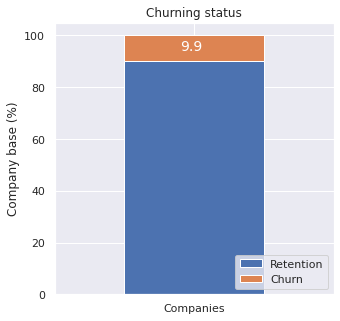

In [ ]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

About 10% of the of total customers have churned. (This sounds about right)

**Sales chanel**

The sales channel seems to be an important feature when predecting the churning of a user. It is not the same if the sales were through email or
telephone.


In [ ]:
channel = train[["id","channel_sales", "churn"]]
channel = channel.groupby([channel["channel_sales"],
 channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

We will plot the categories, despite the fact that data is available for only 75% of the dataset.


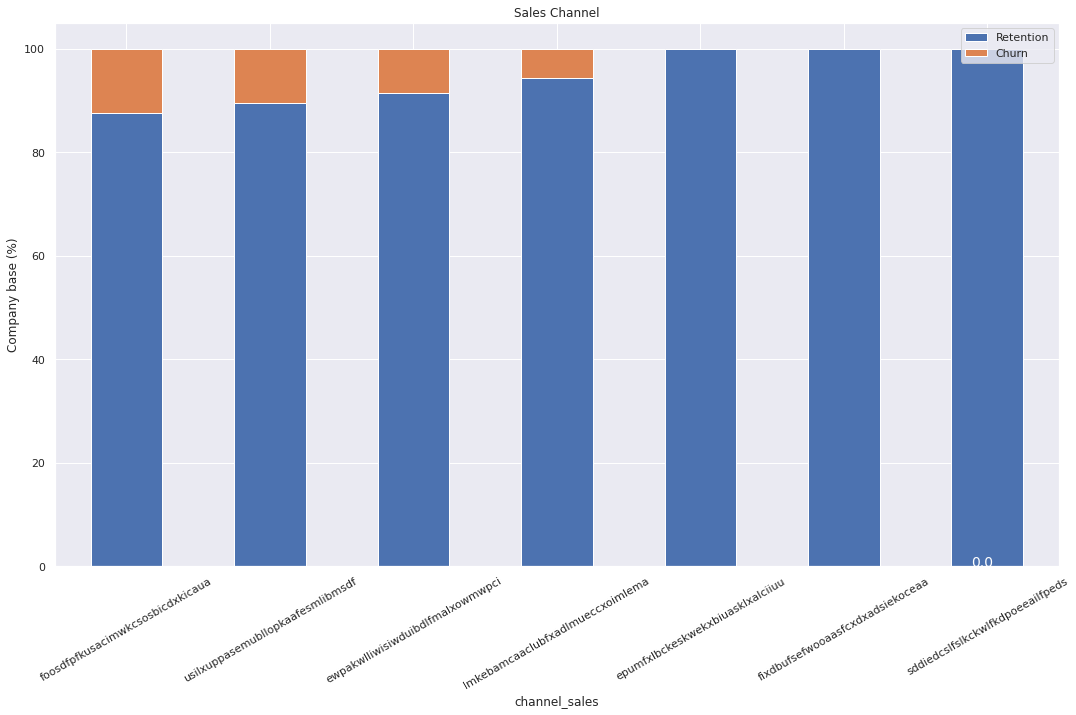

In [ ]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

Nothing out of the normal form this graph above.
If we look at it percentage-wise


# **Data Cleaning**
**Missing Data**

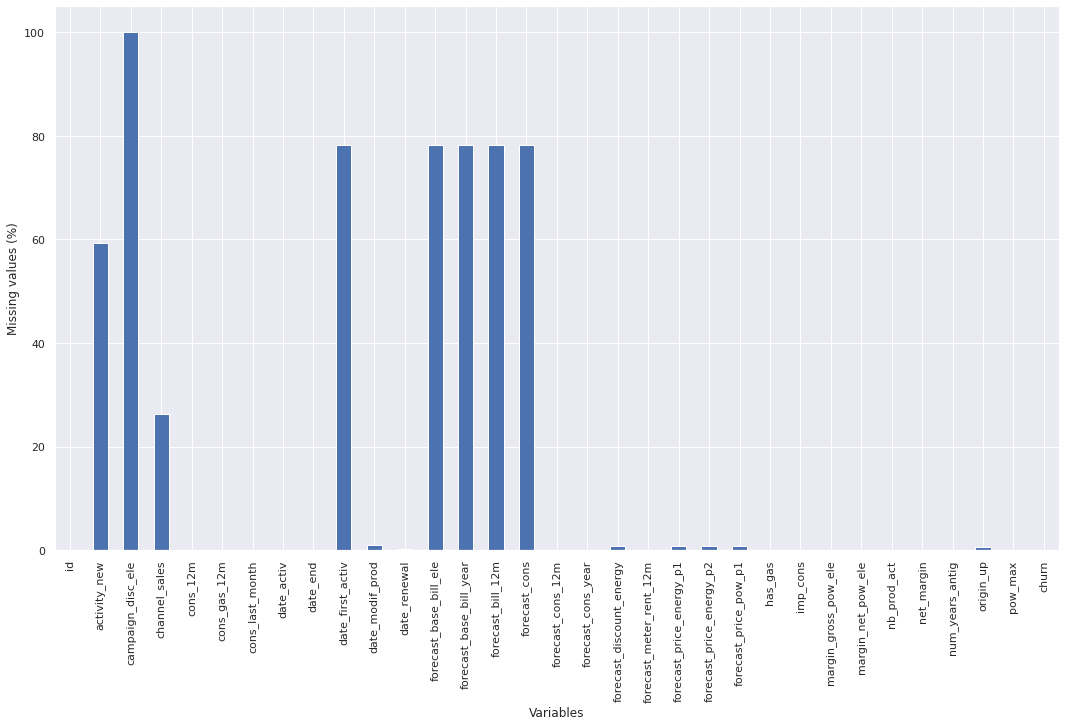

In [ ]:
# Plot missing data
(train.isnull().sum()/len(train.index)*100).plot(kind="bar", figsize=(18,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

For simplicity we will remove the variables with more than 60% of the values missing.
*We might re-use some of these variables if our model is not good enough.


In [ ]:
train.drop(columns=["campaign_disc_ele", "date_first_activ",
 "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons"], inplace=True)

Notice how the columns that we removed do not appear in the dataframe anymore.

**Note**: Showing the columns as a separate dataframe to facilitate visualization


In [ ]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


**Duplicates**
We want to make sure all the data we have is unique and we don't have any duplicated rows. For that, we're going to use the .duplicated()
function in pandas.

This will tell us if there are any duplicated rows.


In [ ]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


# **Formating Data**

**Missing dates**

There could be several ways in which we could deal with the missing dates.

One way, we could "engineer" the dates from known values. For example, the date_renewal is usually the same date as the date_modif_prod
but one year ahead.

The simplest way, we will replace the missing values with the median (the most frequent date). For numerical values, the built-in function .median()
can be used, but this will not work for dates or strings, so we will use a workaround using .value counts()



In [ ]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]

Although we are directly replacing the values in here, it is usually best practice to make a binary flag that indicates when data is
missing because this is informative in itself.


**Missing data**

We might have some prices missing for some companies and months


In [ ]:
missing_data_percentage = history_data.isnull().sum()/len(history_data.index)*100

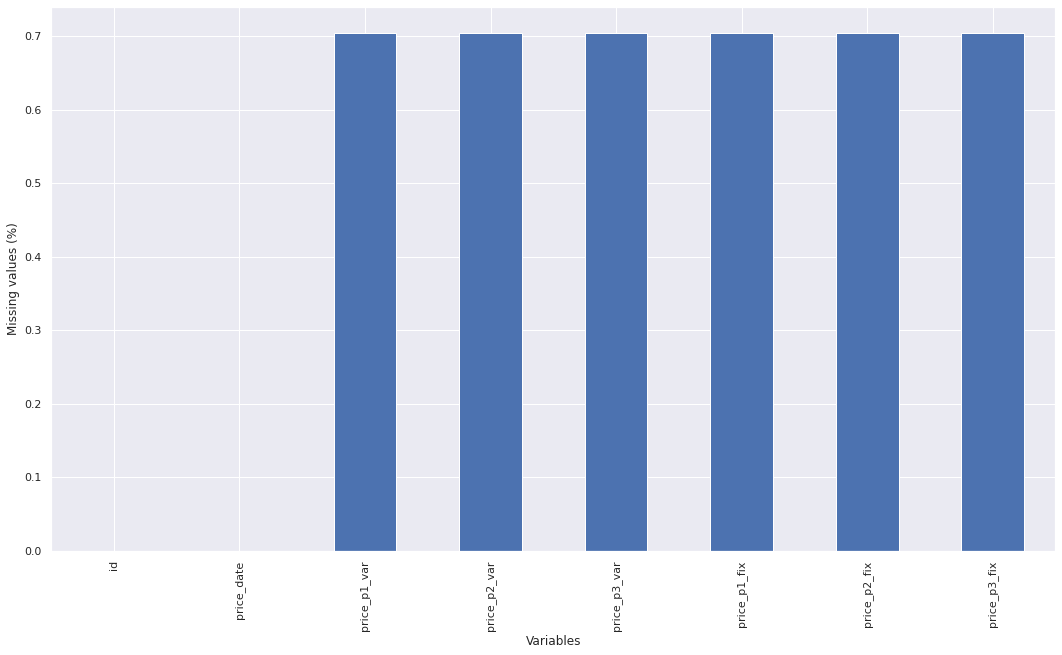

In [ ]:
missing_data_percentage.plot(kind="bar", figsize=(18,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

There is not much data missing. Instead of removing the entries that are empty we will simply substitute them with the median . 

**Note**: We could use something slightly more complicated such as using the mean of the previous and following months to calculate the value of the
missing month since the data does not vary much.


In [ ]:
history_data[history_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


**Negative data**

Let's take a look a the historical price data.

In [ ]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .

Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather than
a "price discount".

We will replace the negative values with the median (most frequent value)
